### Imports

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.datasets import make_classification

# 1. K-nearest Neighbor Classifier
### 1.1. Model Definition
Non-parametric, no model, no learning.

- Given $X_{new}$, find its k-nearest neighbors according to some distance measure
    - Euclidean distance: $(X_i-X_{new})^T(X_i-X_{new})$
- Classify $X_{new}$ as the majority vote, based on the labels of these neighbors

# 2. Naïve Bayes Classifier
### 2.1. Model Definition
Model assumes all features are conditionally independent.

$$P(Y|X_1,\ldots,X_n)=\frac{P(Y)\prod_{i=1}^n P(X_i|Y)}{P(X_1,\dots,X_n)}$$


where 
- $X$ is a feature for a given sample. 
- $n$ is the total number of samples.
- $Y$ is the label for a given sample.


#### Subcomponents


$P(Y)=\pi^Y(1-\pi)^{1-Y}$

where 
- $\pi$ is a parameter defining $P(Y=1)$ and must be learned.

***
If $X_i$ is discrete, $P(X_i|Y)$ follows a Multinoulli distribution:

$P(X_i=k|Y=j)=\prod_k \theta_{ijk}^{(1-\delta(X_i,k))}$

where 
- $\delta(X_i,k)$ is an indicator function which takes value 1 if $X_i=k$ and value 0 otherwise.
- $k$: The number of possible values for a given feature.
***



If $X_i$ is continuous, $P(X_i|Y)$ follows a Gaussian distribution:

$P(X_i|Y)\sim N(\mu_i,\sigma_i^2)$

where 
- $\mu_i$ and $\sigma_i^2$ are parameters which must be learned. 
***
$P(X_1,\dots,X_n)$

where

$P(X_1,\dots,X_n)=P(Y=0)\sum_{i=1}^n P(X_i|Y=0)+P(Y=1)\sum_{i=1}^n P(X_i|Y=1)$

### 2.3. MLE for Naïve Bayes

$$\pi=\frac{s_1}{n}$$

where 
- $s_1$: number of samples with $Y=1$
- $n$: total number of samples

***

$$\theta_{ijk}=\frac{s_{1,k}}{s_1}$$

where
- $s_{1,k}$: number of samples with $X_i=k,Y=1$

In [2]:
# Given $X_{new}$:
# - Compute $P(Y=1)\prod_{i=1}^nP(X_j=X_{j_{new}}|Y=1)$
# - Compute $P(Y=0)\prod_{i=1}^nP(X_j=X_{j_{new}}|Y=0)$
# - Classify $X_{new}$ as the label with the higher probability.

### 2.4. MAP estimation for Naïve Bayes

$$\pi=\frac{s_1+\alpha_0}{n+\alpha_0 + \beta_0}$$

where 
- $s_1$: number of samples with $Y=1$
- $n$: total number of samples
- $\alpha_0$:
- $\beta_0$:

***

$$\theta_{ijk}=\frac{s_{1,k}+\alpha_{ijk0}}{s_1+\alpha_{ijk0}+\beta_{ijk0}}$$

where
- $s_{1,k}$: number of samples with $X_i=k,Y=1$
- $\alpha_{ijk0}$:
- $\beta_{ijk0}$:

# 3. Logistic Regression
### 3.1. Model Definition (two class)
Transforms continuous value from linear regression into discrete values for output.

$$P(Y=1|X=\{X_1,\ldots, X_n\})=\frac{1}{1+\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}$$

$$P(Y=0|X=\{X_1,\ldots, X_n\})=\frac{\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}{1+\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}$$

### 3.2. MCLE for Logistic Regression (two class)
We want to use MCLE to learn the model parameters. MCLE cannot be solved in closed-form with respect to $W$.

$$\hat{W}_{MCLE}=\underset{W}{argmax} \prod_l P(Y^l|X^l,W)$$

where
- $l$: number of training examples

### 3.3. MCLE  for Logistic Regression (two class) with Gradient Descent
Parameters can be derived using gradient descent because logistic regression is concave. Start with a random initialization of parameters. Repeat until the change is less than $\epsilon$, that is, until $l(W)_t - l(W)_{t-1} < \epsilon$.

$$l(W)=\sum_l Y^l(w_0+\sum_i^n w_i X^l_i)-ln(1+exp(w_0+\sum_i^n w_i X^l_i))$$

$$w_i \leftarrow w_i + \eta \nabla(W) $$

where 
- $\eta$ is step size (learning rate)
- $X_i^l$: value of $X_i$ for the $l$th training example.
- $\nabla(W)$ is the gradient

***

#### Subcomponents

$\nabla(W)=\frac{\partial l(W)}{\partial w_i}=\sum_l X^l_i\left(Y^l-\hat{P}(Y^l=1|X^l,W)\right)$

where
- $Y^l-\hat{P}(Y^l=1|X^l,W)$ is the prediction error
- $\hat{P}(Y^l=1|X^l,W)=\frac{exp(w_0+\sum_iw_iX_i)}{1+exp(w_0+\sum_iw_iX_i)}$


According to Mitchell, we accommodate weight $w_0$ by assuming an imaginary $X_0=1$ for all $l$.
***


Pattern for gradient:

$$\frac{\partial l(W)}{\partial w_0}=\sum_l 1 (Y^l - P(Y^l=1|X^l,W))$$

$$\frac{\partial l(W)}{\partial w_1}=\sum_l X_1^l (Y^l - P(Y^l=1|X^l,W))$$

$$\vdots$$

$$\frac{\partial l(W)}{\partial w_n}=\sum_l X_n^l (Y^l - P(Y^l=1|X^l,W))$$

In [3]:
#?? need to mean center data?
#?? when to add imaginary 1 row?
#?? how to accommodate w_0? Assume extra x row of all 1's? best way?
#?? log likelihood returns vector. how to compare vector difference vs epsilon?
#?? how to set starting weights?
#?? how to choose epsilon

In [31]:
def gradient_descent(X,y_true,eta,epsilon,W):
    '''
    Performs gradient descent to derive regression coefficients.
    '''
    # set weights
    weights = W
    
    
    # append imaginary column X_0=1 to accommodate w_0
    X_aug = add_X0(X) 
    print(X_aug)
    
    # calculate original log likelihood
    prev_log_likelihood = calc_log_likelihood(X_aug,y_true,weights)
    print('prev',prev_log_likelihood)
    
#     # perform gradient descent
#     count = 0
#     diff = np.Inf
#     while diff > epsilon:
    
#         count += 1
#         if count > 100000:
#             break  # stop descending
        
#         # update weights
#         y_pred = get_y_predictions(X_aug,weights)
#         gradient = calc_gradient(X_aug,y_true,y_pred)
#         weights = update_weights(weights,eta,gradient)

#         # calculate difference
#         log_likelihood = calc_log_likelihood(X_aug,y_true,weights)
#         diff = prev_log_likelihood - log_likelihood
# #         print(diff)
#         diff = np.min(diff)  #??
# #         print(diff)
        
#         # save log likelihood for next round
#         prev_log_likelihood = log_likelihood
        
#     print('count of rounds',count)
#     return weights   

test add_X0()
test add_X0()


In [51]:
def calc_log_likelihood(X,y_true,W):
    '''
    Calculates log likelihood.
    '''
    
    # left half
    XW = np.matmul(X,W)
    YXW = y_true + XW  # all L samples can be summed in parallel 

    # right half
    num_rows = X.shape[0]
    ones = np.ones(num_rows)  # create a vector of 1's
    inner = ones + np.exp(XW)
    ln_XW = np.log(inner)
    print('ones',ones)
    print('XW',XW)
    print('inner',inner)
    
    return YXW - ln_XW

print('test calc_log_likelihood()')
X_test = np.array([[ .1, .5, .1 ,.1], 
              [ .1, .1, .1 ,.1], 
              [ .1, .1, .2 ,.3]])
W_test = np.array([2,4,5,6])
y_true_test = np.array([1,0,0])
num_rows = X.shape[0]
ones = np.ones(num_rows)

expect_YXW = np.array([4.3, 1.7, 3.4])

expect_inner = 
expected = expect_YXW - np.log(expect_inner)
actual = calc_log_likelihood(X_test,y_true_test,W_test)
np.testing.assert_allclose(actual,expected)  # rounding makes exact match impossible



test calc_log_likelihood()
ones [1. 1. 1.]
XW [3.3 1.7 3.4]
inner [4.3 2.7 4.4]


In [7]:
def get_y_prediction(X,W):
    '''
    Gets y predictions for one X_i.
    Assumes "imaginary" X_0 = 1 for all samples has been added to the matrix.
    '''

    a = np.dot(X,W)
    b = exp(a)
    c = 1 + exp(a)

    return b/c

print('test get_y_prediction()')
X = np.array([1,1,2])
W = np.array([4,5,6])
expected = 1318815734 / 1318815735
actual = get_y_prediction(X,W)
assert actual == expected

test get_y_prediction()


In [8]:
def get_y_predictions(X,W):
    '''
    Gets y predictions for all samples.
    Assumes "imaginary" X_0 = 1 for all samples has been added to the matrix.
    '''
    num_rows = X.shape[0]
    XW = np.matmul(X,W)  # all L samples can be summed in parallel
    top = np.exp(XW)
    ones = np.ones(num_rows)  # create a vector of 1's
    bottom = ones + top
    return top / bottom
        
    
print('test get_y_predictions()')
X = np.array([[ .1, .5, .1 ,.1], 
              [ .1, .1, .1 ,.1], 
              [ .1, .1, .2 ,.3]])
W = np.array([2,4,5,6])

a = get_y_prediction(X[0],W)
b = get_y_prediction(X[1],W)
c = get_y_prediction(X[2],W)

expected = [a,b,c]
actual = get_y_predictions(X,W).tolist()
assert actual==expected,actual

test get_y_predictions()


In [9]:
def calc_gradient(X,y_true,y_pred):
    '''
    Calculates the gradient.
    Assumes "imaginary" X_0 = 1 for all samples has been added to the matrix.
    
    Args:
        X: L x n matrix, where L is the number of samples and n is the number of features
        y_true: L x 1 vector
        y_pred: L x 1 vector
        
    Return:
        Gradient in the form of an L x 1 vector
    '''
    y_err = y_true - y_pred
    return np.matmul(X.T,y_err)

'''
Explanation of how the function works.

X                y_err
| 5 | 1 | 1 |    | 0 |
| 1 | 1 | 1 |    |-1 |
| 1 | 2 | 3 |    | 1 |

Calculating the partial for the ith feature is the same as taking the dot product of the ith column of X and y_err.

X_1         y_err
|x11|       | y1 | 
|x21|  dot  | y2 | 
|x31|       | y3 |

w_1 = (x11*y1) + (x21*y2) + (x31*y3)

X_2         y_err
|x12|       | y1 | 
|x22|  dot  | y2 | 
|x32|       | y3 |

w_2 = (x12*y1) + (x22*y2) + (x32*y3)

X_3         y_err
|x13|       | y1 | 
|x23|  dot  | y2 | 
|x33|       | y3 |

w_3 = (x13*y1) + (x23*y2) + (x33*y3)

Instead of calculating partials one by one, we can perform matrix multiplication to do all at the same time. 
However, we need to transpose X first, because we want to perform column-wise multiplications.

X              y_err
|x11|x12|x13|  | y1 | 
|x21|x22|x23|  | y2 |
|x31|x32|x33|  | y3 |

(X)(y_err)
| (x11*y1) + (x12*y2) + (x13*y3) |
| (x21*y1) + (x22*y2) + (x23*y3) |
| (x31*y1) + (x32*y2) + (x33*y3) |

X_transpose    y_err
|x11|x21|x31|  | y1 | 
|x12|x22|x32|  | y2 |
|x13|x23|x33|  | y3 |

W = (X_transpose)(y_err)
| w1 |    | (x11*y1) + (x21*y2) + (x31*y3) |
| w2 | =  | (x12*y1) + (x22*y2) + (x32*y3) |
| w3 |    | (x13*y1) + (x23*y2) + (x33*y3) |
'''

print('test calc_gradient()')
X = np.array([[ 1, 5, 1 ,1], 
              [ 1, 1, 1 ,1], 
              [ 1, 1, 2 ,3]])  # includes imaginary X_0=1 column
y_true = np.array([1, 0, 1])
y_pred = np.array([1, 1, 0])
expected = np.array([0, 0, 1, 2]).tolist()
actual = calc_gradient(X,y_true,y_pred).tolist()
assert actual == expected

test calc_gradient()


In [10]:
def update_weights(W,eta,gradient):
    '''
    W <- W + eta * gradient
    '''
    change = eta * gradient
    return W + change

print('test update_weights()')
eta = 0.01
gradient = np.array([1,-2,3])
W = np.array([4,5,6])
expected = [4.01,4.98,6.03]
actual = update_weights(W,eta,gradient).tolist()
assert actual == expected,actual

test update_weights()


In [30]:
class LogisticRegression:
    

    

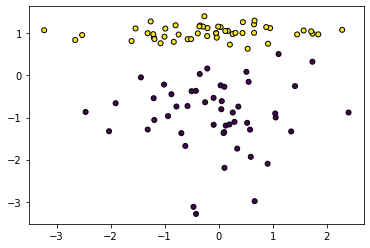

[[-1.26027422  1.28265276]
 [-0.93884188 -0.96598454]
 [-0.3875902   0.99848772]
 [ 0.2593788  -0.88002654]
 [-0.42430349 -0.36606471]]
[1 0 1 0 0]


In [34]:
X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1,
            s=25, edgecolor='k')
plt.show()
print(X1[:5])
print(y1[:5])

In [50]:
X1 = np.array([[-1.26027422,  1.28265276],
                 [-0.93884188, -0.96598454],
                 [-0.3875902,   0.99848772],
                 [ 0.2593788,  -0.88002654],
                 [-0.42430349, -0.36606471]])
y1 = np.array([1, 0, 1, 0, 0])

X1_aug = np.array([[ 1.,         -1.26027422,  1.28265276],
                     [ 1. ,        -0.93884188, -0.96598454],
                     [ 1.    ,     -0.3875902,   0.99848772],
                     [ 1.   ,       0.2593788,  -0.88002654],
                     [ 1.   ,      -0.42430349, -0.36606471]])
W = np.ones(3)

a = np.matmul(X1_aug,W)
b = y1 + a
print(b)

[ 2.02237854 -0.90482642  2.61089752  0.37935226  0.2096318 ]


In [52]:
lr = LogisticRegression(eta=0.01,epsilon=0.001)
lr.fit(X1,y1)

[[ 1.         -1.26027422  1.28265276]
 [ 1.         -0.93884188 -0.96598454]
 [ 1.         -0.3875902   0.99848772]
 [ 1.          0.2593788  -0.88002654]
 [ 1.         -0.42430349 -0.36606471]]
ones [1. 1. 1. 1. 1.]
XW [ 1.02237854 -0.90482642  1.61089752  0.37935226  0.2096318 ]
inner [2.02237854 0.09517358 2.61089752 1.37935226 1.2096318 ]
prev [1.31810423 1.44722648 1.65120348 0.05773825 0.01931578]


In [ ]:
# graph line across data

### 3.4. MAP estimation  for Logistic Regression (two class) with Gradient Descent
Regularization term helps reduce overfitting, especially when training data is sparse.

$$l(W)=?$$

$$w_i \leftarrow w_i -\eta\lambda w_i + \eta \sum_l X^l_i\left(Y^l-\hat{P}(Y^l=1|X^l,W)\right) $$

where
- $\lambda$ is a regularization term, $\lambda=\frac{1}{2\sigma^2}$

### 3.5. Model Definition (multiclass)
Logistic Regression for more than two classes. Learn $R-1$ set of weights.

For $k<R$:

$$P(Y=y_k|X=\{X_1,\ldots, X_n\})=\frac{\exp{(w_{k,0} + \sum_{i=1}^n w_{k,i}X_i)}}{1+\sum_{j=1}^{R-1}\exp{(w_{j,0} + \sum_{i=1}^n w_{ji}X_i)}}$$

where
- $R$: number of classes

***

For $k=R$:

$$P(Y=y_R|X=\{X_1,\ldots, X_n\})=\frac{1}{1+\sum_{j=1}^{R-1}\exp{(w_{j,0} + \sum_{i=1}^n w_{ji}X_i)}}$$